<center>

# Analyse Stress Level

</center>


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') 

# Load Dataset

In [2]:
df=pd.read_csv('/kaggle/input/student-lifestyle-data/student_lifestyle_dataset.csv')

In [3]:
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

# Describe Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [5]:
df.describe()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.500000              2.600000   
75%               8.800000              4.100000   
max              10.000000              6.000000   

       Physical_Activity_Hours_Per_Day          GPA  
count                       2000.00000  2000.000000  
mean                           4.32830     3.115960  
std                            2.51411     0.298674  
min                            0.00000     2.240000  
25%                            2.40000     2.900000  
50%                            4.10000     3.110000  
75%                            6.10000     3.330000  
max                           13.00000     4.000000

In [6]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

# Wrangling

In [7]:
df.isna().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [8]:
df['Stress_Level'].value_counts()

Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

<center>

# Visualization & EDA

</center>


In [9]:
# Define a color palette for the three stress levels
palette = {'Low': 'green', 'Moderate': 'blue', 'High': 'red'}

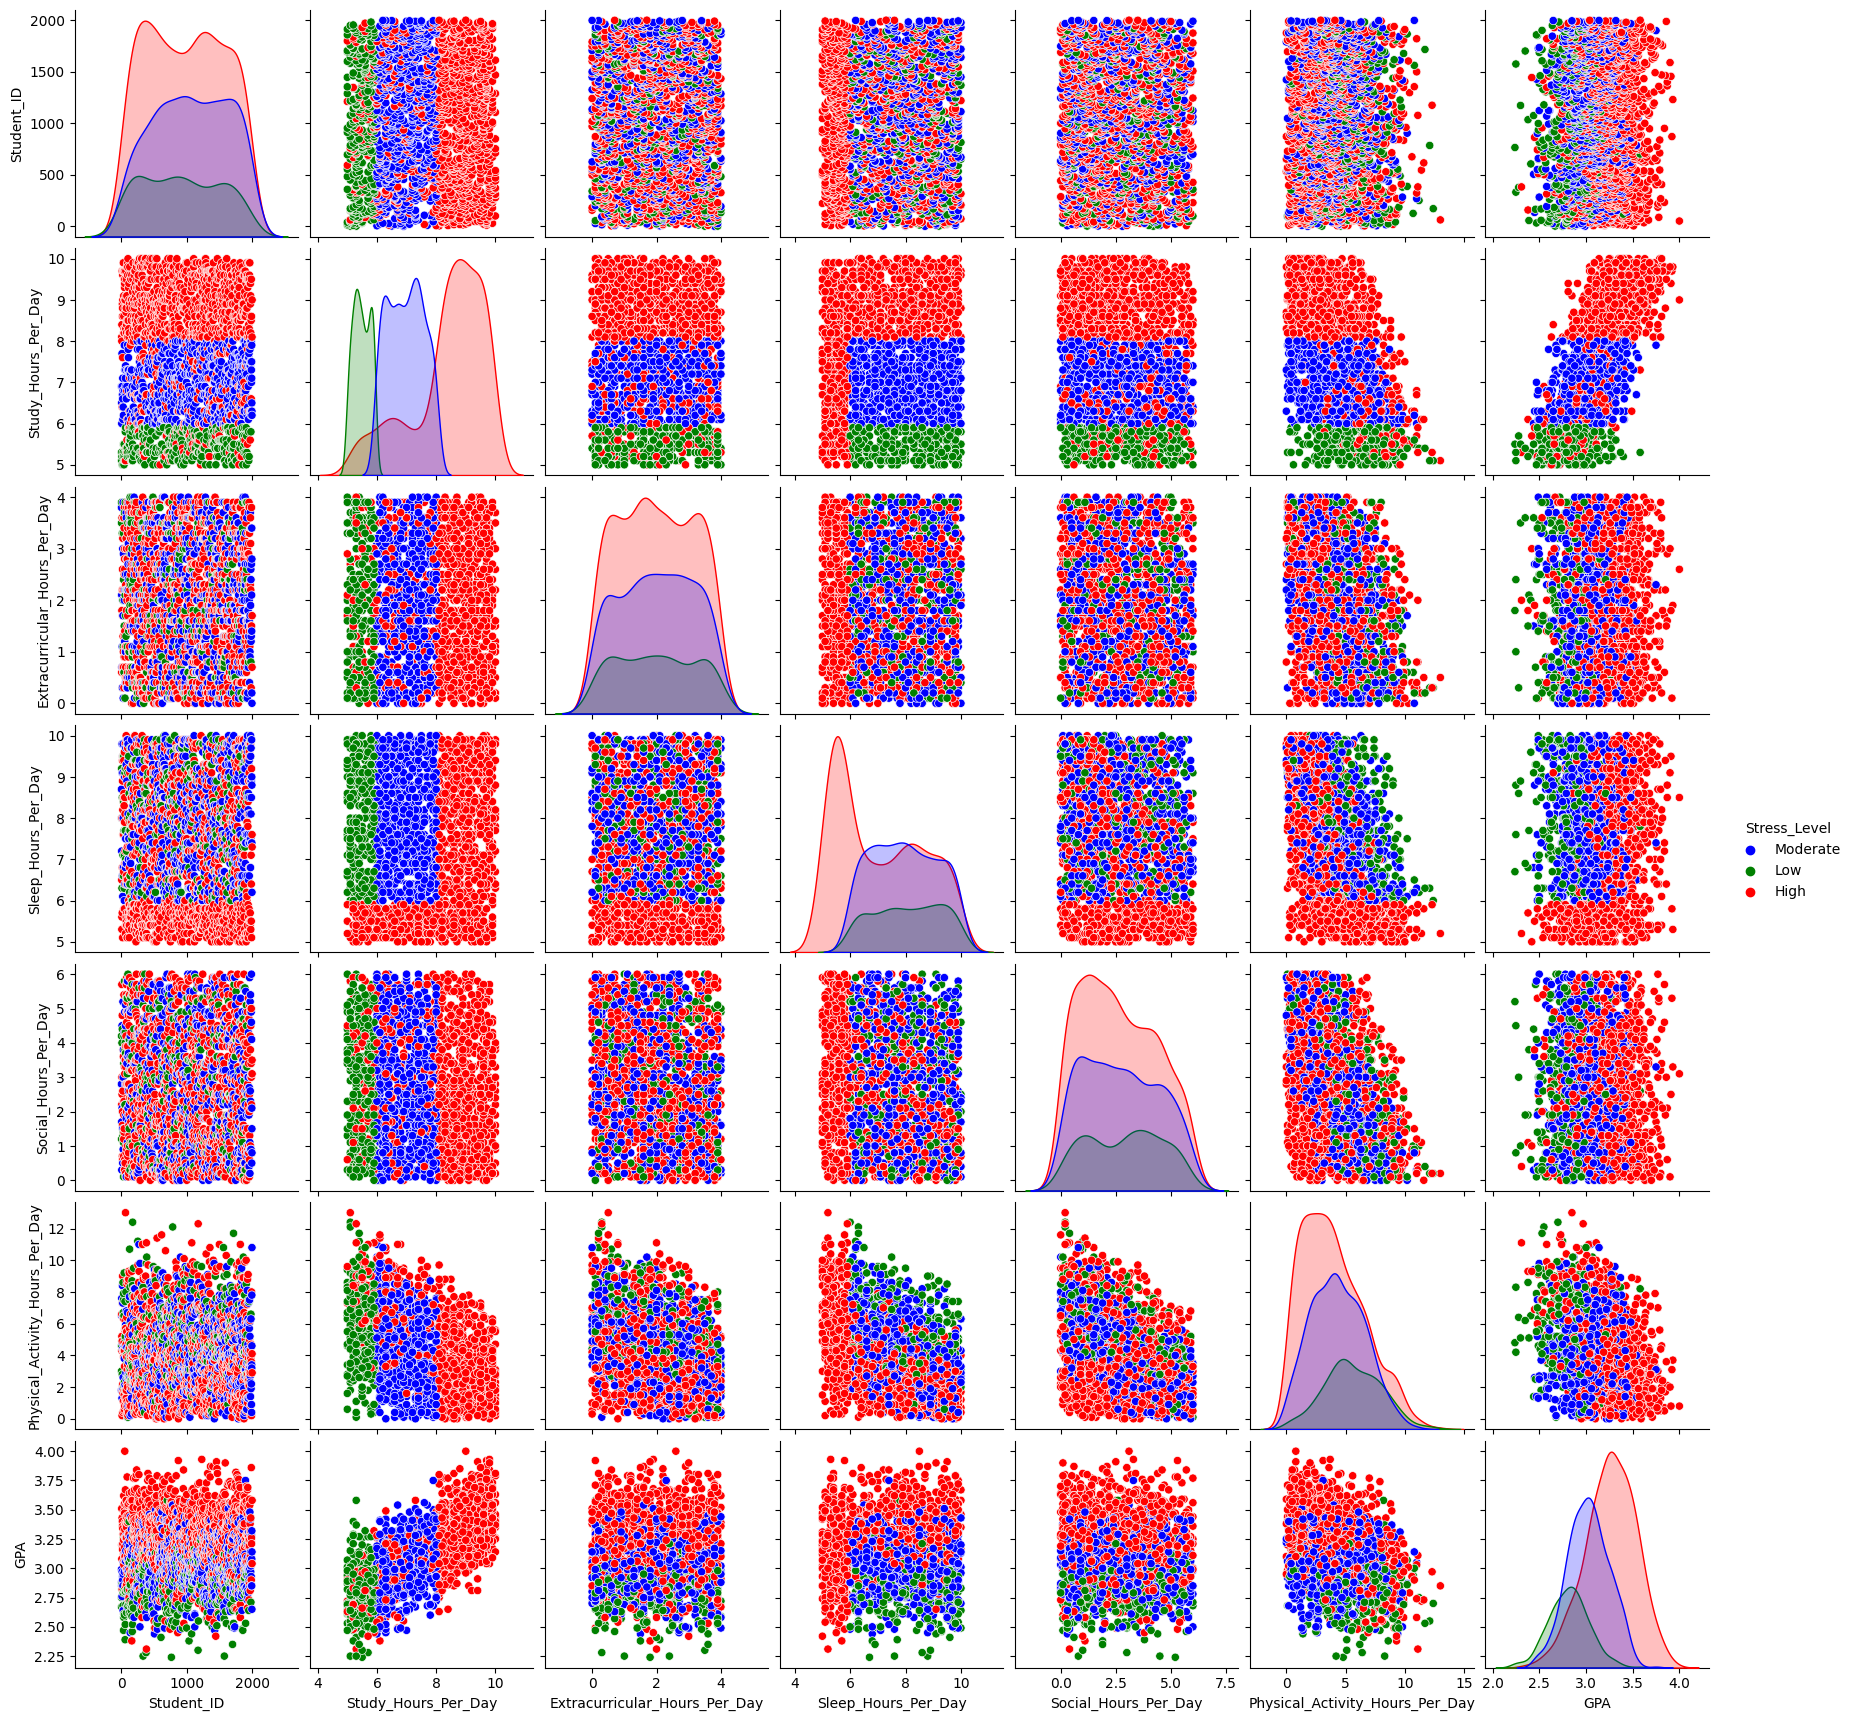

In [10]:
sns.pairplot(df,hue='Stress_Level',palette=palette)

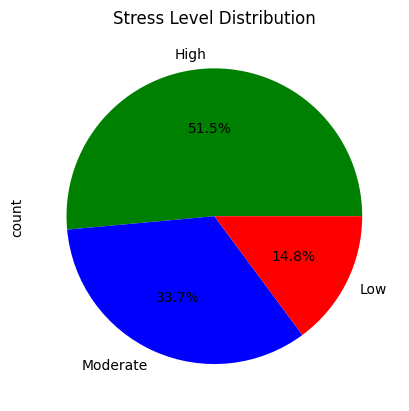

In [11]:
# dispersion of stress pie plot
df['Stress_Level'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Stress Level Distribution')
plt.show()

### Majority of People are Highly Stressed

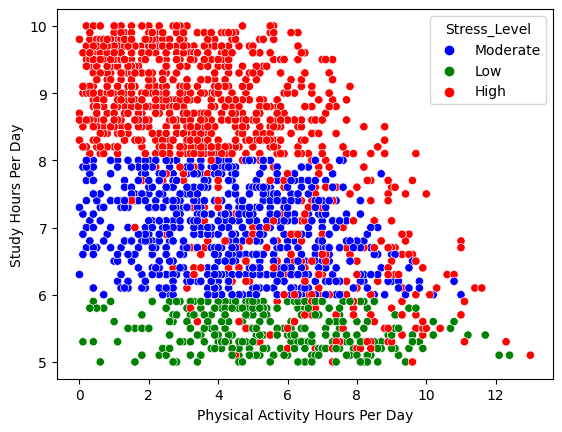

In [12]:

# Physical activity hours per day vs Study hours per day
sns.scatterplot(x='Physical_Activity_Hours_Per_Day',y='Study_Hours_Per_Day',data=df,hue='Stress_Level',palette=palette)
plt.xlabel('Physical Activity Hours Per Day')
plt.ylabel('Study Hours Per Day')
plt.show()


### More Physical activity less Stress & Less Study Less Stress

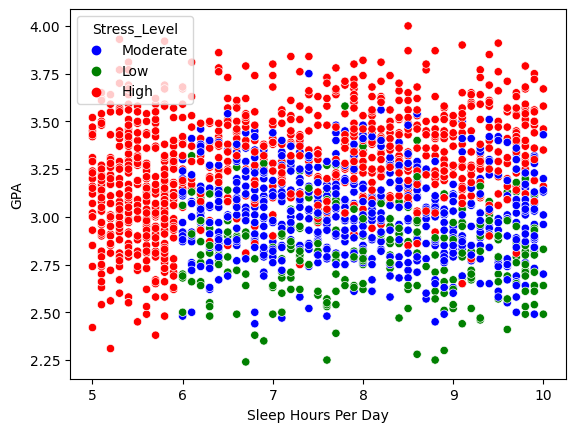

In [13]:

# GPA vs Sleep hours per day
sns.scatterplot(x='Sleep_Hours_Per_Day', y='GPA', data=df, hue='Stress_Level', palette=palette)
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('GPA')
plt.show()

### More sleep less Stress & More GPA More Stress

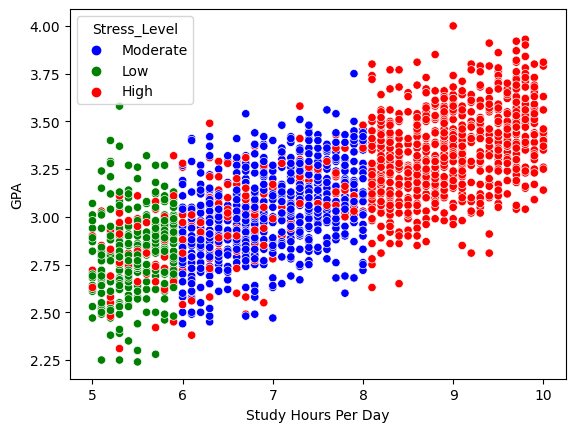

In [14]:
# plot study hours per day vs GPA
sns.scatterplot(x='Study_Hours_Per_Day',y='GPA',data=df,hue='Stress_Level',palette=palette)
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.show()

### Who study more get more stress & more GPA

# EDA Outcomes
## Lots of students feel stressed out. This stress often comes from:

- Studying too much: Studying a lot can make people feel overwhelmed.
- Not sleeping enough: Not getting enough sleep can make it hard to focus and can lead to increased stress.
- Not exercising enough: Physical activity can help reduce stress and improve mood.

It's important for students to find a balance between their studies, their social life, and their mental health. By taking   breaks, getting enough sleep, and exercising regularly, students can feel less stressed and more relaxed.

# Convert to Numerical

In [15]:
map={'Low':0,'Moderate':1,'High':2}
df['Stress_Level']=df['Stress_Level'].map(map)

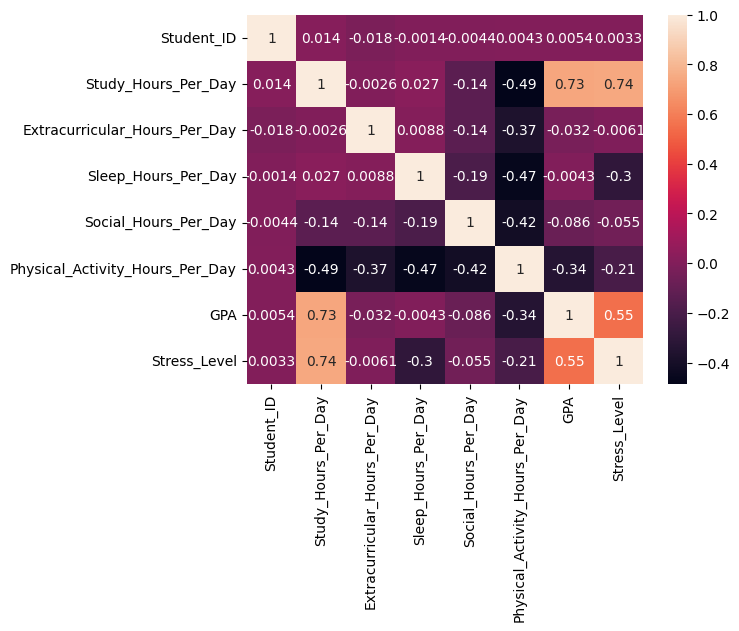

In [16]:
#plot correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

# Splitting Data to Train and Test

In [17]:
from sklearn.model_selection import train_test_split


X=df[['Study_Hours_Per_Day','GPA']]
y=df['Stress_Level']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


<center>

# Model Training And Testing

</center>

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log, "%")

Logistic Regression Accuracy:  74.69 %


# SVC

In [19]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("SVM Accuracy: ", acc_svc, "%")

SVM Accuracy:  85.38 %


# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("KNN Accuracy: ", acc_knn, "%")

KNN Accuracy:  88.88 %


# Gaussian

In [21]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("Naive Bayes Accuracy: ", acc_gaussian, "%")

Naive Bayes Accuracy:  80.38 %


# Perceptron

In [22]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print("Perceptron Accuracy: ", acc_perceptron, "%")

Perceptron Accuracy:  57.94 %


# Linear SVC

In [23]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print("Linear SVC Accuracy: ", acc_linear_svc, "%")

Linear SVC Accuracy:  70.0 %


# SGD Classifier

In [24]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print("SGD Accuracy: ", acc_sgd, "%")

SGD Accuracy:  79.94 %


# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Decision Tree Accuracy: ", acc_decision_tree, "%")

Decision Tree Accuracy:  95.44 %


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Random Forest Accuracy: ", acc_random_forest, "%")

Random Forest Accuracy:  95.44 %


# Determining The Best Model

In [27]:
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron',
'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model  Score
3               Random Forest  95.44
8               Decision Tree  95.44
1                         KNN  88.88
0     Support Vector Machines  85.38
4                 Naive Bayes  80.38
6  Stochastic Gradient Decent  79.94
2         Logistic Regression  74.69
7                  Linear SVC  70.00
5                  Perceptron  57.94